<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных:

In [2]:
# Ипомрт необходимых библиотек:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

from numpy.random import RandomState
RANDOM_STATE = RandomState(0)

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.inspection import permutation_importance


1.1. Откроем файлы и изучим их:

In [4]:
#Загрузим данные:
data_train = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_train.csv')
data_test = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_test.csv')
data_full = pd.read_csv('https://code.s3.yandex.net/datasets/gold_industry_full.csv')

In [5]:
#Изучим данные:
data_train.info()
data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


Все типы данных float64, кроме date(object). Его стоит изменить на тип datetime.

In [6]:
#Изменим тип данных параметра date:
for data in [data_full, data_train, data_test]:
           for column in data:
            if 'date' in column:
                data[column]=pd.to_datetime(data[column])

In [7]:
#Проверим, что получилось:
data_train.info()
data_test.info()
data_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                14579 non-null  datetime64[ns]
 1   rougher.input.feed_au                               14579 non-null  float64       
 2   rougher.input.feed_ag                               14579 non-null  float64       
 3   rougher.input.feed_pb                               14507 non-null  float64       
 4   rougher.input.feed_sol                              14502 non-null  float64       
 5   rougher.input.feed_rate                             14572 non-null  float64       
 6   rougher.input.feed_size                             14478 non-null  float64       
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64       
 8   roughe

In [8]:
#Проверим на дубликаты:
data_full.duplicated().sum()
data_test.duplicated().sum()
data_train.duplicated().sum()

0

Отлично, дубликатов в данных нет.

In [9]:
# проверяем пропущенные значения в иcходном файле
print(data_full.isna().sum().sort_values(ascending=False))

print(data_test.isna().sum().sort_values(ascending=False))

print(data_train.isna().sum().sort_values(ascending=False))

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
                                            ... 
rougher.output.tail_sol                        0
primary_cleaner.input.feed_size                0
rougher.input.feed_au                          0
primary_cleaner.output.concentrate_au          0
date                                           0
Length: 87, dtype: int64
secondary_cleaner.state.floatbank2_a_air      126
rougher.input.floatbank11_xanthate             46
rougher.input.feed_size                        44
primary_cleaner.input.xanthate                 43
rougher.input.feed_pb                          28
rougher.input.feed_sol                         22
primary_cleaner.input.depressant                9
rougher.input.floatbank11_sulfate               8
rougher.state.floatbank10_e_air     

Заменю пропуски на последнее ненулевое до этого значение, так как соседние по времени параметры похожи.

In [10]:
#В этом мне поможет метод 'ffill' в аргументе:
data_full = data_full.fillna(method='ffill')
data_train= data_train.fillna(method='ffill') 
data_test = data_test.fillna(method='ffill')

In [11]:
#Проверю, что получилось:
print(data_full.isna().sum().sort_values(ascending=False))

print(data_test.isna().sum().sort_values(ascending=False))

print(data_train.isna().sum().sort_values(ascending=False))

date                                                  0
primary_cleaner.output.tail_sol                       0
secondary_cleaner.state.floatbank3_b_level            0
secondary_cleaner.state.floatbank3_b_air              0
secondary_cleaner.state.floatbank3_a_level            0
                                                     ..
rougher.output.concentrate_au                         0
rougher.calculation.au_pb_ratio                       0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
rougher.calculation.floatbank10_sulfate_to_au_feed    0
final.output.tail_sol                                 0
Length: 87, dtype: int64
date                                          0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.f

In [12]:
data_full = data_full[data_full['rougher.output.recovery'] > 0]
data_full = data_full[data_full['final.output.recovery'] > 0]

data_train = data_train[data_train['rougher.output.recovery'] > 0]
data_train = data_train[data_train['final.output.recovery'] > 0]

Отлично, пропусков теперь нет.

1.2. Проверю, что эффективность обогащения рассчитана правильно. Вычислю её на обучающей выборке для признака rougher.output.recovery. Найду MAE между моими расчётами и значением признака.

In [13]:
#рассчитаем recovery по формуле из тз:
data_train['recovery'] = (data_train['rougher.output.concentrate_au']*(data_train['rougher.input.feed_au'] \
- data_train['rougher.output.tail_au']))/(data_train['rougher.input.feed_au']*(data_train['rougher.output.concentrate_au'] \
- data_train['rougher.output.tail_au']))*100

In [14]:
data_train['recovery']

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14574    87.684717
14575    90.677361
14576    89.574376
14577    87.724007
14578    88.890579
Name: recovery, Length: 14089, dtype: float64

In [16]:
print(mean_absolute_error(data_train['rougher.output.recovery'], data_train['recovery']))

1.0108805615202916e-14


Вывод: Эффективность обогащения рассчитана правильно, так как MAE стремится к нулю.

1.3. Проанализируем признаки, недоступные в тестовой выборке.

In [17]:
#Уберем из обучающей выборки тестовую:
train_wo_test = data_train.drop(columns=list(data_test.columns))

In [18]:
#Изучим данные:
train_wo_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14089 entries, 0 to 14578
Data columns (total 35 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   rougher.calculation.sulfate_to_au_concentrate       14089 non-null  float64
 1   rougher.calculation.floatbank10_sulfate_to_au_feed  14089 non-null  float64
 2   rougher.calculation.floatbank11_sulfate_to_au_feed  14089 non-null  float64
 3   rougher.calculation.au_pb_ratio                     14089 non-null  float64
 4   rougher.output.concentrate_au                       14089 non-null  float64
 5   rougher.output.concentrate_ag                       14089 non-null  float64
 6   rougher.output.concentrate_pb                       14089 non-null  float64
 7   rougher.output.concentrate_sol                      14089 non-null  float64
 8   rougher.output.recovery                             14089 non-null  float64
 9   

In [19]:
train_wo_test.head()

,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,...,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,recovery
0,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,...,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297,87.107763
1,42050.861809,3498.370979,3489.981857,2.858998,20.050975,11.615865,7.278807,28.067063,86.843261,1.184827,...,42.701629,6.029369,9.968944,5.257781,69.266198,2.224930,10.462676,0.927452,16.634514,86.843261
2,42018.101184,3495.348910,3502.359819,2.945989,19.737170,11.695753,7.216833,27.454037,86.842308,1.162562,...,42.657501,6.055926,10.213995,5.383759,68.116445,2.257889,10.507046,0.953716,16.208849,86.842308
3,42029.447991,3498.578313,3499.162912,3.002340,19.320810,11.915047,7.175616,27.341277,87.226430,1.079755,...,42.689819,6.047977,9.977019,4.858634,68.347543,2.146849,10.422762,0.883763,16.532835,87.226430
4,42125.354245,3494.800771,3506.679315,3.169615,19.216101,12.411054,7.240205,27.041023,86.688794,1.012642,...,42.774141,6.148599,10.142511,4.939416,66.927016,2.055292,10.360302,0.792826,16.525686,86.688794


Вывод: В тестовой выборке нет целевых признаков для моделей 'rougher.output.recovery', 'final.output.recovery', а также значения output по всем операциям по всем элементам. Они могут быть только после прохождения всехт этапов, после реальных изменений, поэтому их и нет. Для моделей прогнозирования восстановлю целевые признаки для тестовой выборки.

In [20]:
# добавим недостающие данные в data_test
data_test = data_test.merge(data_full[['final.output.recovery', 'rougher.output.recovery', 'date']], how='left', on='date')

Потом, при необходимости, в ходе работы, можно удалить эти данные в одну строчку кода.

## Анализ данных:

2.1. Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки:

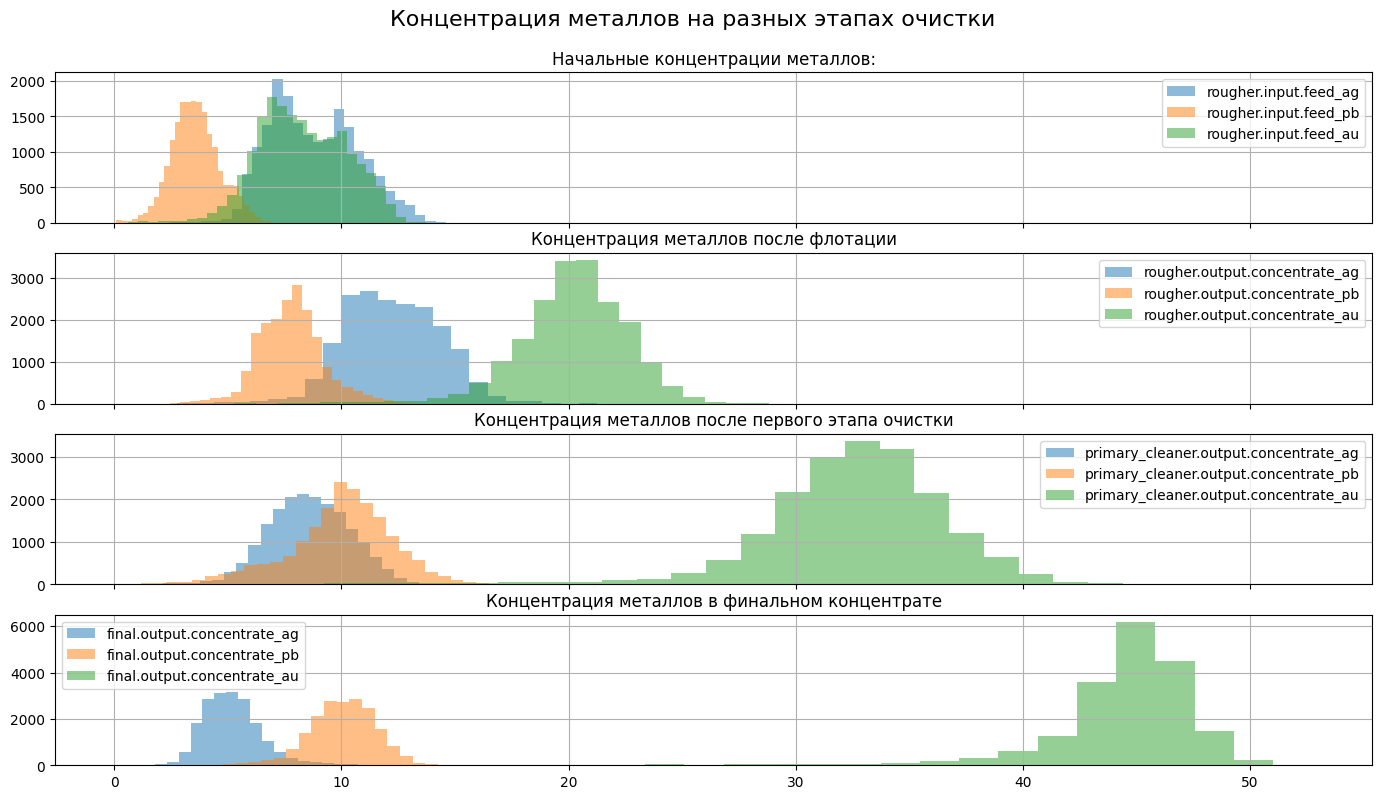

In [21]:
#Построю гистограммы распределения, расчеты проведу сразу в hist:
fig, ax = plt.subplots(4, 1, sharex='all')
fig.set_figheight(9)
fig.set_figwidth(17)
fig.suptitle('Концентрация металлов на разных этапах очистки', y=0.95, size=16)

ax[0].hist(data_full[data_full['rougher.input.feed_ag']>0.01]['rougher.input.feed_ag']\
, bins=30, alpha = 0.5, label = 'rougher.input.feed_ag')
ax[0].hist(data_full[data_full['rougher.input.feed_ag']>0.01]['rougher.input.feed_pb']\
, bins=30, alpha = 0.5, label = 'rougher.input.feed_pb')
ax[0].hist(data_full[data_full['rougher.input.feed_ag']>0.01]['rougher.input.feed_au']\
, bins=30, alpha = 0.5, label = 'rougher.input.feed_au')
ax[0].legend()
ax[0].set_title('Начальные концентрации металлов:')
ax[0].grid()

ax[1].hist(data_full[data_full['rougher.output.concentrate_ag']>0.01]['rougher.output.concentrate_ag']\
, bins=30, alpha = 0.5, label = 'rougher.output.concentrate_ag')
ax[1].hist(data_full[data_full['rougher.output.concentrate_ag']>0.01]['rougher.output.concentrate_pb']\
, bins=30, alpha = 0.5, label = 'rougher.output.concentrate_pb')
ax[1].hist(data_full[data_full['rougher.output.concentrate_ag']>0.01]['rougher.output.concentrate_au']\
, bins=30, alpha = 0.5, label = 'rougher.output.concentrate_au')
ax[1].legend()
ax[1].set_title('Концентрация металлов после флотации')
ax[1].grid()

ax[2].hist(data_full[data_full['primary_cleaner.output.concentrate_ag']>0.01]['primary_cleaner.output.concentrate_ag']\
, bins=30, alpha = 0.5, label = 'primary_cleaner.output.concentrate_ag')
ax[2].hist(data_full[data_full['primary_cleaner.output.concentrate_pb']>0.01]['primary_cleaner.output.concentrate_pb']\
, bins=30, alpha = 0.5, label = 'primary_cleaner.output.concentrate_pb')
ax[2].hist(data_full[data_full['primary_cleaner.output.concentrate_au']>0.01]['primary_cleaner.output.concentrate_au']\
, bins=30, alpha = 0.5, label = 'primary_cleaner.output.concentrate_au')
ax[2].legend()
ax[2].set_title('Концентрация металлов после первого этапа очистки')
ax[2].grid()


ax[3].hist(data_full[data_full['final.output.concentrate_ag']>0.01]['final.output.concentrate_ag']\
, bins=30, alpha = 0.5, label = 'final.output.concentrate_ag')
ax[3].hist(data_full[data_full['final.output.concentrate_pb']>0.01]['final.output.concentrate_pb']\
, bins=30, alpha = 0.5, label = 'final.output.concentrate_pb')
ax[3].hist(data_full[data_full['final.output.concentrate_au']>0.01]['final.output.concentrate_au']\
, bins=30, alpha = 0.5, label = 'final.output.concentrate_au')
ax[3].legend()
ax[3].set_title('Концентрация металлов в финальном концентрате')
ax[3].grid()

plt.show()

Вывод:
    Выделяется в положительную сторону концентрация золота, причем на каждом этапе обработки сырья. Что касается свинца, то ее концентрация после первого этапа очистки увеличивается, а после второго - остается такой же. А с серебром все хуже: после первого этапа очистки - уменьшается концентрация, после второго - тоже. 

2.2.  Сравню распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

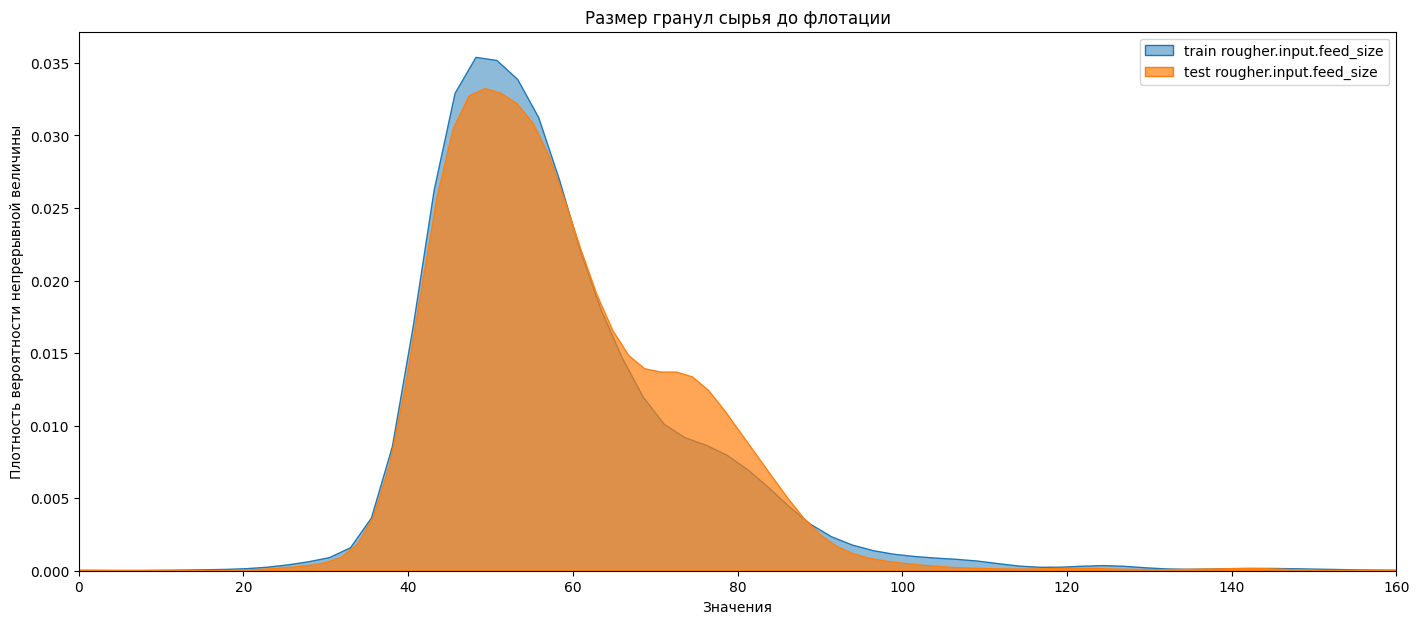

In [22]:
# Сделаем гистограмму размеров сырья на входе флотации train и test:
plt.figure(figsize=(17, 7))
sns.kdeplot(data_train['rougher.input.feed_size'], label='train rougher.input.feed_size', alpha=0.5, shade=True)
sns.kdeplot(data_test['rougher.input.feed_size'], label='test rougher.input.feed_size', alpha=0.7, shade=True)
plt.xlim([0, 160])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности непрерывной величины')
plt.title('Размер гранул сырья до флотации')
plt.legend(loc='upper right')
plt.show()

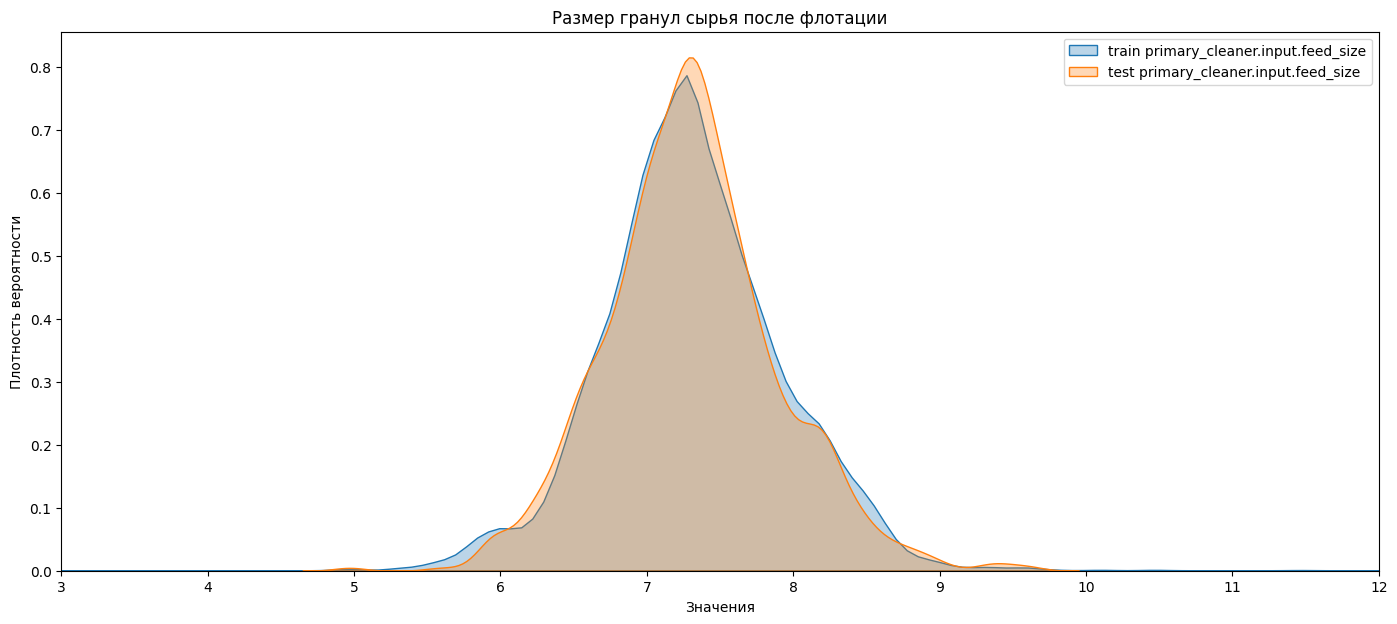

In [23]:
#Сделаем гистограмму размеров сырья на входе финальной очистки train и test
plt.figure(figsize=(17, 7))
sns.kdeplot(data_train['primary_cleaner.input.feed_size'], 
         label='train primary_cleaner.input.feed_size', alpha=0.3, shade=True)
sns.kdeplot(data_test['primary_cleaner.input.feed_size'],  
         label='test primary_cleaner.input.feed_size', alpha=0.3, shade=True)
plt.xlim([3, 12])
plt.xlabel('Значения')
plt.ylabel('Плотность вероятности')
plt.title('Размер гранул сырья после флотации')
plt.legend(loc='upper right')
plt.show()

Вывод: Так как графики похожи, можно сделать вывод, что размер гранул сырья тоже не сильно изменился.

2.3. Исследую суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 

Подготоволю заранее суммарные концентрации всех веществ на каждом этапе для дальнейшего построения графика:

In [24]:
#Сумма концентрации всех веществ в сырье:
data_full['sum_concetrate_base']\
= data_full['rougher.input.feed_ag']\
+ data_full['rougher.input.feed_pb']\
+ data_full['rougher.input.feed_sol']\
+ data_full['rougher.input.feed_au']

In [25]:
#Сумма концентрации всех веществ в черновом концентрате:
data_full['sum_concetrate_rougher']\
= data_full['rougher.output.concentrate_ag']\
+ data_full['rougher.output.concentrate_pb']\
+ data_full['rougher.output.concentrate_sol']\
+ data_full['rougher.output.concentrate_au']

In [26]:
#Сумма концентрации всех веществ в финальном концентрате:
data_full['sum_concetrate_final']\
= data_full['final.output.concentrate_ag']\
+ data_full['final.output.concentrate_pb']\
+ data_full['final.output.concentrate_sol']\
+ data_full['final.output.concentrate_au']

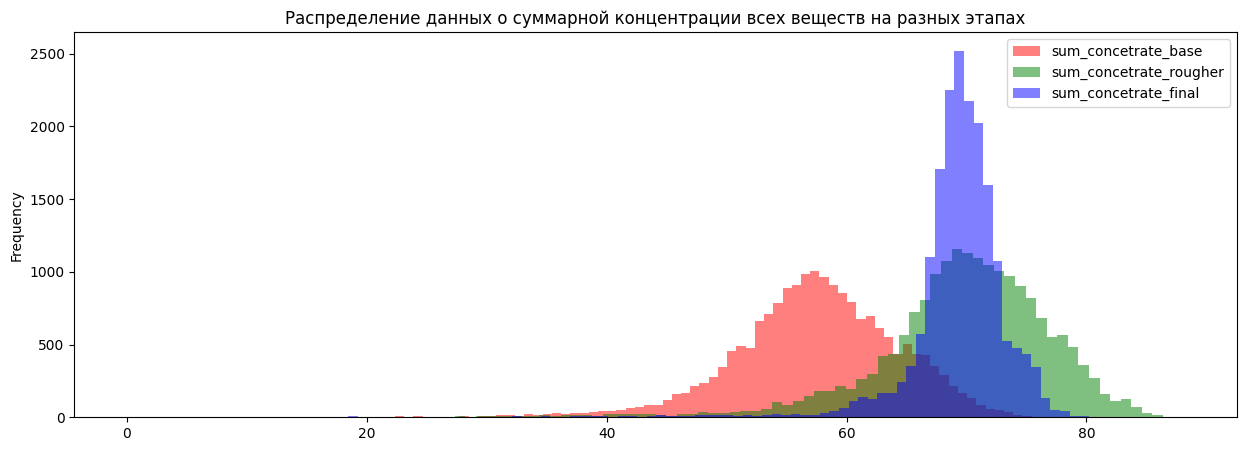

In [27]:
# строим гистограмму распределения данных по всем этапам
plt.figure(figsize=(15, 5))

data_full['sum_concetrate_base'].plot(kind = 'hist', color='red', alpha = 0.5, label = 'sum_concetrate_base'\
                                         , bins = 100)
data_full['sum_concetrate_rougher'].plot(kind = 'hist', color = 'green', alpha = 0.5, label = 'sum_concetrate_rougher' \
                                         , bins = 100)
data_full['sum_concetrate_final'].plot(kind = 'hist', color='blue', alpha = 0.5, label = 'sum_concetrate_final'\
                                         , bins = 100)
plt.title('Распределение данных о суммарной концентрации всех веществ на разных этапах')
plt.legend()
plt.show()

Вывод: Суммарная концентрация всех веществ на разных этапах постепенно сокращает разброс данных, распределение уплотняется и растет, особенно в финальном концентрате.

In [28]:
#Отфильтрую объекты с нулевыми значениями переменных из выборок:
data_full = data_full[data_full['primary_cleaner.output.concentrate_ag'] > 0]
data_train = data_train[data_train['primary_cleaner.output.concentrate_ag'] > 0]

display(data_full.shape)
display(data_train.shape)

(18848, 90)

(13988, 88)

## Обучение модели:

Для начала разделю и подготоволю данные для обучения:

In [29]:
#Поделю данные features и target:
columns = data_test.columns

features_train = data_train[columns] 
features_train = features_train.drop(['date', 'rougher.output.recovery','final.output.recovery'],axis=1) 
target_train = data_train[['rougher.output.recovery','final.output.recovery']] 

data_test_target = data_test.join(data_full, how = 'left', rsuffix="_dummy") #Создам дату со всеми признаками для тестовой выборки
data_test_target = data_test_target.dropna() #Удалю пропуски:
features_test = data_test_target[columns] #фичерс для тестовой выборки:
features_test = features_test.drop(['date', 'rougher.output.recovery','final.output.recovery'],axis=1) #удалю параметры даты
target_test = data_test_target[['rougher.output.recovery','final.output.recovery']] # формируем вектор целевых признаков

In [30]:
features_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13988 entries, 0 to 14578
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   rougher.input.feed_au                       13988 non-null  float64
 1   rougher.input.feed_ag                       13988 non-null  float64
 2   rougher.input.feed_pb                       13988 non-null  float64
 3   rougher.input.feed_sol                      13988 non-null  float64
 4   rougher.input.feed_rate                     13988 non-null  float64
 5   rougher.input.feed_size                     13988 non-null  float64
 6   rougher.input.floatbank10_sulfate           13988 non-null  float64
 7   rougher.input.floatbank10_xanthate          13988 non-null  float64
 8   rougher.state.floatbank10_a_air             13988 non-null  float64
 9   rougher.state.floatbank10_a_level           13988 non-null  float64
 10  rougher.state.f

In [31]:
#Стандартизирую данные:

scaler = StandardScaler()
scaler.fit(features_train)

features_train_st = scaler.transform(features_train)
features_test_st = scaler.transform(features_test)

3.1. Напишу функцию для вычисления итоговой sMAPE:

In [32]:

def sMAPE(predict,target):
    
    predict_rougher = predict[:,0]
    target_rougher = target[:,0]
    
    predict_final = predict[:,1]
    target_final = target[:,1]
    
    sMAPE_rougher = np.sum(abs(target_rougher - predict_rougher) / ((abs(target_rougher) + abs(predict_rougher)) / 2))
    
    sMAPE_rougher = sMAPE_rougher / len(target_rougher) * 100
       
    sMAPE_final = np.sum(abs(target_final - predict_final) / ((abs(target_final) + abs(predict_final)) / 2))
    sMAPE_final = sMAPE_final / len(target_final) * 100
    
    sMAPE = 0.25 * sMAPE_rougher + 0.75 * sMAPE_final
    
    return sMAPE

In [33]:
smape_scorer = make_scorer(sMAPE, greater_is_better = False)

3.2. Обучу разные модели и оценю их качество кросс-валидацией. Выберу лучшую модель и проверю её на тестовой выборке.

Линейная регрессия:

In [34]:
# кросс-валидация Линейная регрессия
lr = LinearRegression()
score = cross_val_score(lr, features_train_st, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('LinearRegression sMAPE:', abs(score))

LinearRegression sMAPE: 8.690651144626804


Лассо:

In [35]:
# кросс-валидация Lasso
la = Lasso()
score = cross_val_score(la, features_train_st, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('LASSO sMAPE:', abs(score))

LASSO sMAPE: 8.346589054082857


DecisionTreeRegressor:

In [36]:
#подберу лучший max_depth для DecisionTreeRegressor:
#и SMAPE:
max_depth = range(1, 50)
hyperparameters = dict(max_depth=max_depth)
dt = DecisionTreeRegressor(random_state = 0)

randomizedsearch = RandomizedSearchCV(dt, hyperparameters, random_state = 0 \
                                      , scoring= smape_scorer)

dt_best_model_random = randomizedsearch.fit(features_train, np.array(target_train))
print(dt_best_model_random.best_estimator_, -dt_best_model_random.best_score_)

DecisionTreeRegressor(max_depth=5, random_state=0) 9.65132923795675


In [37]:
# кросс-валидация DecisionTreeRegressor
dt_best = DecisionTreeRegressor(random_state = 0, max_depth=8)

score = cross_val_score(dt_best, features_train_st, np.array(target_train), scoring = smape_scorer, cv=6).mean()
print('DecisionTreeRegressor sMAPE:', abs(score))

DecisionTreeRegressor sMAPE: 11.053871152485291


Лучший SMAPE получился на LASSO. Проверю его на тестовой выборке.

Проверю лучшую модель на тестовой выборке:

In [38]:
# проверяем лучшую модель на тестовой выборке
la = Lasso()
la.fit(features_train_st, target_train)
predict = la.predict(features_test_st)

smape = sMAPE(predict, np.array(target_test))
print('Симметричная средняя абсолютная ошибка лучшей модели LASSO:', smape)

Симметричная средняя абсолютная ошибка лучшей модели LASSO: 7.463170968985525


модель рекомендуется компании, разрабатывающей решения для эффективной работы промышленных предприятий по восстановлению золота из золотоносной руды

In [39]:
# производим проверку с константной моделью, настроенной на стратегию медианы
dummy_regr = DummyRegressor(strategy = "median")
dummy_regr.fit(features_train_st, target_train)
predict = dummy_regr.predict(features_test_st)

smape = sMAPE(predict, np.array(target_test))
print('Симметричная средняя абсолютная ошибка константной модели:', smape)

Симметричная средняя абсолютная ошибка константной модели: 8.345470033690138


При сравнении с константной моделью ясно, что моя модель, обученная на DecisionTreeRegressor, предсказывает лучше, а значит адекватно. 

## ИТОГОВЫЙ ВЫВОД:

Я загрузила необходимые библиотеки, загрузила и изучила данные, подготовила данные для дальнейшей работы. Проверила, правильно ли рассчитана эффективность обогащения. Проанализировала признаки, недоступные в тестовой выборке. Оказалось, что ожидаемых признаков нет, которые могут появиться только после всех этапов, наш прогноз. Но для обучения модели добавила их в тестовую выборку. Проанализировала, как меняется концентрация металлов на различных этапах очистки, лучше всего себя показало золотое - на каждом этапе концентрация повышается. Сравнила распределение размером гранул сырья на обучающей и тестовой выборке: графики похожи, а значит, распределения различаются не сильно, размеры гранул сырья меняются не сильно, из-за этого оценка модели не пострадает. Исследовала суммарную концентрацию всех веществ на каждом этапе: не считая выбросы из-за некорректного ввода, суммарная концентрация всех веществ на разных этапах постепенно растет. Разделила и подготовила данные для обучения. Написала функцию для вычесления итоговой sMAPE. Выбрала лучшую модель с помощью оценки качества кросс-валидацией. Проверила лучшую модель на тестовой выборке. sMAPE меня и там устроил,а значит, модель можно рекомендоать компании.